In [1]:
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path

['',
 'C:\\Users\\gandh\\Downloads\\Datasets\\The Federalist',
 'C:\\Users\\gandh\\Anaconda3\\python36.zip',
 'C:\\Users\\gandh\\Anaconda3\\DLLs',
 'C:\\Users\\gandh\\Anaconda3\\lib',
 'C:\\Users\\gandh\\Anaconda3',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\gandh\\.ipython']

In [3]:
import federalist

In [18]:
df=federalist.load_federalist_dataset()

In [19]:
df.shape

(85, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
paper_id       85 non-null object
text           85 non-null object
date           85 non-null object
title          85 non-null object
author         85 non-null object
venue          84 non-null object
wordcount      85 non-null object
total_words    85 non-null float64
dtypes: float64(1), object(7)
memory usage: 5.4+ KB


In [21]:
df.drop(columns='wordcount',axis=1,inplace=True)

In [22]:
df['number_of_sentences']=0

for i in range(0,len(df)):
    #Number of sentences
    df['number_of_sentences'].iloc[i]=len(df['text'].iloc[i].split('.'))
    #Number of words
    #temp=df['text'].iloc[0].replace('.',' ').replace("  "," ").replace("   "," ")
    #len(temp.split(" "))

In [23]:
corpuslist=[]

In [24]:
for i in range(0,len(df)):
    t=list(set(df['text'].iloc[i].replace("."," ").replace('"',' ').replace("  "," ").split(" ")))
    for word in t:
        if word in corpuslist:
            pass
        elif len(word)<2:
            pass            
        else:
            corpuslist.append(word)
            continue
    

In [25]:
for row in range(0,len(df)):
    for word in corpuslist:
        temp=word+'_count'
        if temp in df.columns:
            pass
        else:
            df[temp]=0
        df[temp].iloc[row]=df['text'].iloc[row].count(word)

In [26]:
df.shape

(85, 8823)

In [27]:
df=df[df['author']!='JAY']

In [28]:
df.shape

(80, 8823)

In [29]:
df2=df[(df.author=='HAMILTON') | (df.author=='MADISON')]

In [30]:
df_test=df[df.author=='HAMILTON OR MADISON']

In [31]:
df2.groupby('author').sum()['total_words']/df2.groupby('author').sum()['number_of_sentences']

author
HAMILTON    34.491463
MADISON     35.250000
dtype: float64

In [32]:
df2.head(1)

,paper_id,text,date,title,author,venue,total_words,number_of_sentences,respect_count,who_count,...,trembling_count,aspersions_count,completion_count,honestly_count,moulding_count,dilated_count,prostration_count,prodigy_count,published_count,insincerity_count
0,1,to the people of the state of new york after a...,null,General Introduction,HAMILTON,For the Independent Journal,1618.0,51,3,9,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
df2['author']=le.fit_transform(df2['author'])

In [36]:
X=df2.iloc[:,6:]
y=df2.iloc[:,4]

In [37]:
X.shape

(66, 8817)

In [38]:
y.shape

(66,)

In [39]:
#df2['author'].hist(bins=50)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [42]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
rf=RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
predictions=rf.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve,accuracy_score

In [54]:
print("Confusion Matrix : ",confusion_matrix(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))



Confusion Matrix :  [[6 0]
 [1 0]]
Accuracy Score :  0.8571428571428571
Precision Score :  0.0
Recall Score :  0.0


C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
rf.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
#X_train.iloc[:,np.argsort(rf.feature_importances_)].columns

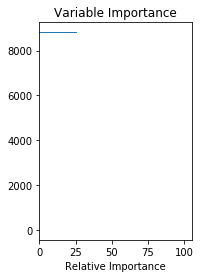

In [57]:
plt.Figure(figsize=(100,20))
feature_importance=rf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(train_x.columns))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [58]:
columnlist=X_train.iloc[:,sorted_idx[0:50]].columns

In [59]:
X_train=X_train[columnlist]

In [60]:
X_test=X_test[columnlist]

In [61]:
from sklearn.feature_selection import RFE

In [62]:
rf=RandomForestClassifier()

In [63]:
rfe = RFE(rf,25,verbose=True)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
[ True False False False False False  True  True False  True False False
 False  True False  True  T

In [64]:
rfe.ranking_[0]

1

In [65]:
count=[]
for i in range(0,len(rfe.ranking_)):
    if rfe.ranking_[i]==1:
        count.append(i)
    else:
        continue
        
        

In [66]:
X_train=X_train.iloc[:,count]
X_test=X_test.iloc[:,count]

In [67]:
X_test.shape

(7, 25)

In [68]:
columnslist=X_train.columns

In [69]:
list(columnslist)+['author']

['total_words',
 'tame_count',
 'deliver_count',
 'tell_count',
 'enact_count',
 'eloquence_count',
 'circumscribing_count',
 'abolishing_count',
 'transforming_count',
 'nowhere_count',
 'breath_count',
 'proposes_count',
 'entitle_count',
 'draw_count',
 'ducats_count',
 'evolutions_count',
 'requiring_count',
 'aristocratic_count',
 'mingling_count',
 'gravity_count',
 'anxiety_count',
 'reserve_count',
 'obligatory_count',
 'sow_count',
 'bankrupt_count',
 'author']

In [70]:
df2[list(columnslist)+['author']].corr()['author']

total_words             2.711651e-01
tame_count              1.150447e-01
deliver_count           2.288008e-01
tell_count             -1.332541e-01
enact_count            -6.039982e-02
eloquence_count         1.150447e-01
circumscribing_count   -6.726728e-02
abolishing_count       -6.726728e-02
transforming_count     -6.726728e-02
nowhere_count           5.522779e-02
breath_count           -1.183453e-01
proposes_count          1.150447e-01
entitle_count          -1.065862e-17
draw_count              2.556550e-01
ducats_count           -6.726728e-02
evolutions_count       -1.863210e-02
requiring_count         2.776029e-01
aristocratic_count      5.522779e-02
mingling_count          1.150447e-01
gravity_count          -6.726728e-02
anxiety_count           1.653012e-01
reserve_count           1.972096e-01
obligatory_count        5.522779e-02
sow_count               1.150447e-01
bankrupt_count          1.755642e-01
author                  1.000000e+00
Name: author, dtype: float64

In [71]:
df2.groupby('author').sum()[['lend_count','anxiety_count','ensue_count','sow_count','represent_count','ors_count','empower_count','arming_count','tame_count','selfpreservation_count','total_words']]

,lend_count,anxiety_count,ensue_count,sow_count,represent_count,ors_count,empower_count,arming_count,tame_count,selfpreservation_count,total_words
author,,,,,,,,,,,
0,15,2,3,1,114,142,9,5,1,1,113132.0
1,7,2,2,1,68,73,1,3,1,1,41031.0


In [72]:
df2.groupby('author').sum()['lend_count']

author
0    15
1     7
Name: lend_count, dtype: int64